There are 100 passengers about to board a plane

The first passenger sits in someone elses seat

Each following passenger;

- Sits in their assigned seat if it is avaliable
- Otherwise, randomly chooses an avaliable seat

You are the 100th passenger to board the plane, what is the probability that you are able to sit in your assigned seat?


In [32]:
import numpy as np
import random 

def board_plane(plane_size, PRINT_EVENTS=False):
    
    plane = {}
    
    for seat_number in range(plane_size):
        plane[seat_number] = 'empty'
        
    passengers = [i for i in range(plane_size)]
    
    random.shuffle(passengers)
    
    
    ## Sit the first passenger in the wrong seat
    while (rand_seat := random.randint(0, plane_size-1)) == passengers[0]:
        pass
        ## Pick another random seat which isnt the assigned one

    plane[rand_seat] = 'taken'
    if (PRINT_EVENTS):
        print(f'Passenger {passengers[0]} sits in seat {rand_seat}')
    
    ## Seat the 2nd to 2nd last passengers according to logic above
    for passenger in passengers[1:-1]:
        if plane[passenger] == 'empty':
            ## This passenger can sit in their assigned seat
            if (PRINT_EVENTS):
                print(f'Passenger with seat {passenger} sits in their assigned seat')
            plane[passenger] = 'taken'
        else:
            ## Someone is sitting in this passenger's seat, find a random empty seat for them
            seats = list(plane.items())
            random.shuffle(seats)
            for seat_number, avaliability in seats:
                if avaliability == 'empty':
                    plane[seat_number] = 'taken'
                    if (PRINT_EVENTS):
                        print(f'Passenger with seat {passenger} sits in seat {seat_number}')
                    break
                    
    ## Check to see if the last passenger has thier seat
    if plane[passengers[-1]] == 'empty':
        return True
    else:
        return False

board_plane(plane_size=10, PRINT_EVENTS=True)

Passenger 0 sits in seat 3
Passenger with seat 2 sits in their assigned seat
Passenger with seat 5 sits in their assigned seat
Passenger with seat 8 sits in their assigned seat
Passenger with seat 7 sits in their assigned seat
Passenger with seat 9 sits in their assigned seat
Passenger with seat 4 sits in their assigned seat
Passenger with seat 6 sits in their assigned seat
Passenger with seat 3 sits in seat 1


False

Is the event that the last passenger sits in their assigned seat independent of the size of the plane?

We could be smart about it and construct a mathematical proof. However, such things are too difficult for the mere computer scientist. Alas, we shall simulate such events. This has the added advantage of being applicable when the situation is more complicated and a proof cannot be demonstrated.

We'll simulate boarding planes of size 10, 30, 60, 100, 150, 200 once on each day of the month, compute the experimental probability that the last passenger was able to sit in their assigned seat that month, then repeat this process for 100 years (1200 months). 

In [33]:
resulting_prob = {}

plane_sizes = [10, 30, 60, 100, 150, 200]

for plane_size in plane_sizes:
    resulting_prob[plane_size] = []
    for months in range(1200):
    
        able_to_sit_in_assigned_seat = 0
        
        for day in range(31):
            if (board_plane(plane_size)):
                able_to_sit_in_assigned_seat += 1
        
        probability_this_year = able_to_sit_in_assigned_seat/31
        
        resulting_prob[plane_size].append(probability_this_year)

import pandas

data1 = pandas.DataFrame(resulting_prob)
print(data1)

           10        30        60        100       150       200
0     0.516129  0.483871  0.354839  0.645161  0.516129  0.516129
1     0.419355  0.645161  0.580645  0.548387  0.516129  0.645161
2     0.419355  0.516129  0.516129  0.290323  0.580645  0.387097
3     0.387097  0.483871  0.451613  0.419355  0.483871  0.516129
4     0.419355  0.645161  0.516129  0.709677  0.354839  0.580645
...        ...       ...       ...       ...       ...       ...
1195  0.580645  0.516129  0.548387  0.451613  0.451613  0.580645
1196  0.548387  0.322581  0.290323  0.419355  0.483871  0.451613
1197  0.451613  0.516129  0.580645  0.548387  0.451613  0.483871
1198  0.387097  0.516129  0.354839  0.580645  0.645161  0.580645
1199  0.451613  0.548387  0.516129  0.612903  0.419355  0.645161

[1200 rows x 6 columns]


In [34]:
from matplotlib import rcParams

rcParams['text.usetex'] = True
rcParams['figure.figsize'] = (6, 4)
rcParams['figure.dpi'] = 200

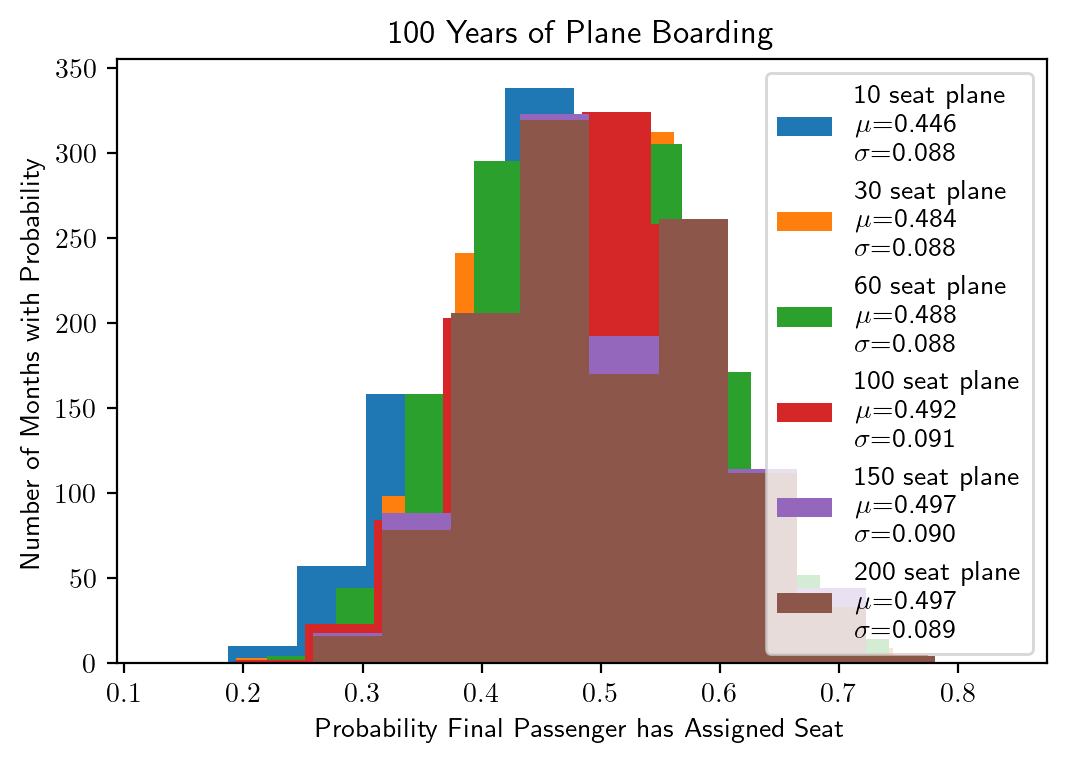

In [35]:

import matplotlib.pyplot as plt

plt.title("100 Years of Plane Boarding")
plt.ylabel('Number of Months with Probability')
plt.xlabel('Probability Final Passenger has Assigned Seat')

from statistics import mean, stdev

for plane_size in plane_sizes:
    plt.hist(data1[plane_size], label=f"""{plane_size} seat plane 
             $\mu$={mean(data1[plane_size]):.3f}
             $\sigma$={stdev(data1[plane_size]):.3f}""")


plt.legend()
plt.savefig("plane-hist.png")

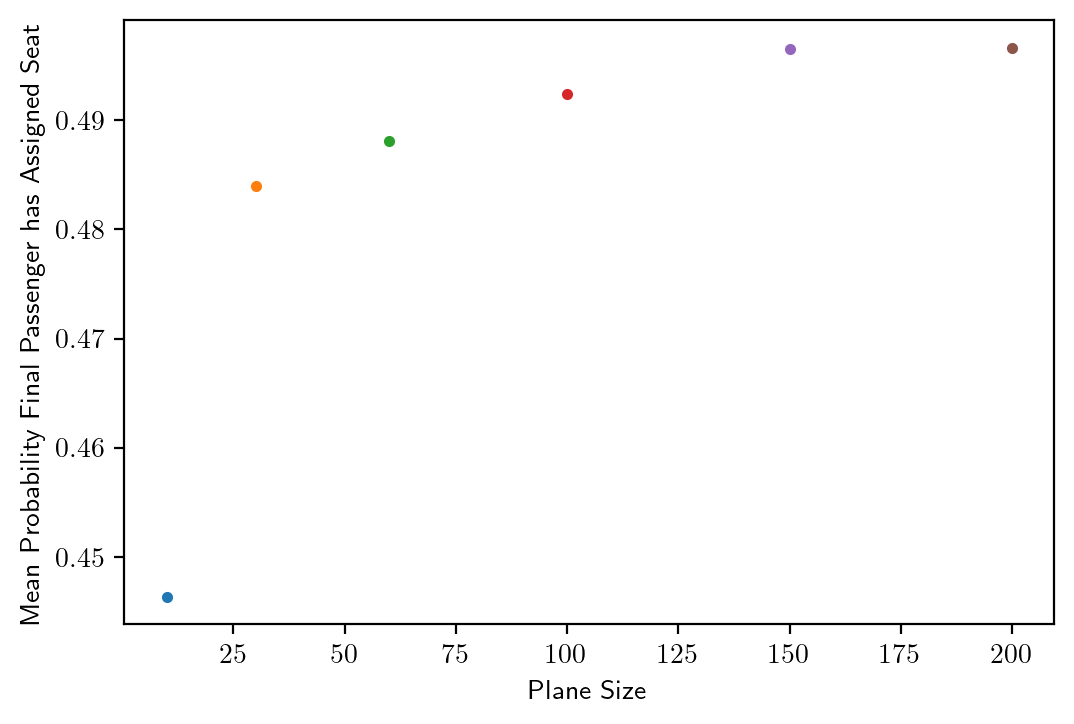

In [36]:
for plane_size in plane_sizes:
    plt.plot(plane_size, mean(data1[plane_size]), '.')

plt.xlabel('Plane Size')
plt.ylabel('Mean Probability Final Passenger has Assigned Seat')
plt.savefig('meanprobvsplanesize.png')

In [ ]:
for size in plane_sizes:
    plt.plot([size]*len(data1[size]), data1[size], '.')
    
plt.xlabel('Plane Size')
plt.ylabel('Probability Final Passenger has Assigned Seat')

In [ ]:
resulting_prob = {}

plane_sizes = np.arange(10, 120, 5)

for plane_size in plane_sizes:
    resulting_prob[plane_size] = []
    for months in range(1200*10):
    
        able_to_sit_in_assigned_seat = 0
        
        for day in range(31):
            if (board_plane(plane_size)):
                able_to_sit_in_assigned_seat += 1
        
        probability_this_year = able_to_sit_in_assigned_seat/31
        
        resulting_prob[plane_size].append(probability_this_year)

data2 = pandas.DataFrame(resulting_prob)
print(data2)

In [ ]:
for plane_size in plane_sizes:
    plt.plot(plane_size, mean(data2[plane_size]), '.')

plt.ylim([0.44, 0.5])
plt.title('A Millennia of Boarding')
plt.xlabel('Plane Size')
plt.ylabel('Mean Probability Final Passenger has Assigned Seat')
plt.savefig('meanprobvsplanesize-manyplanes.png')

In [ ]:
def board_plane_random(plane_size, PRINT_EVENTS=False):
    
    plane = {}
    
    for seat_number in range(plane_size):
        plane[seat_number] = 'empty'
        
    passengers = [i for i in range(plane_size)]
    
    random.shuffle(passengers)
    
    
    ## Sit the first passenger in a random seat
    rand_seat = random.randint(0, plane_size-1)

    plane[rand_seat] = 'taken'
    if (PRINT_EVENTS):
        print(f'Passenger {passengers[0]} sits in seat {rand_seat}')
    
    ## Seat the 2nd to 2nd last passengers according to logic above
    for passenger in passengers[1:-1]:
        if plane[passenger] == 'empty':
            ## This passenger can sit in their assigned seat
            if (PRINT_EVENTS):
                print(f'Passenger with seat {passenger} sits in their assigned seat')
            plane[passenger] = 'taken'
        else:
            ## Someone is sitting in this passenger's seat, find a random empty seat for them
            seats = list(plane.items())
            random.shuffle(seats)
            for seat_number, avaliability in seats:
                if avaliability == 'empty':
                    plane[seat_number] = 'taken'
                    if (PRINT_EVENTS):
                        print(f'Passenger with seat {passenger} sits in seat {seat_number}')
                    break
                    
    ## Check to see if the last passenger has thier seat
    if plane[passengers[-1]] == 'empty':
        return True
    else:
        return False

board_plane(plane_size=10, PRINT_EVENTS=True)

In [ ]:
resulting_prob = {}

plane_sizes = np.arange(10, 120, 5)

for plane_size in plane_sizes:
    resulting_prob[plane_size] = []
    for months in range(1200):
    
        able_to_sit_in_assigned_seat = 0
        
        for day in range(31):
            if (board_plane_random(plane_size)):
                able_to_sit_in_assigned_seat += 1
        
        probability_this_year = able_to_sit_in_assigned_seat/31
        
        resulting_prob[plane_size].append(probability_this_year)

data3 = pandas.DataFrame(resulting_prob)
print(data3)

In [ ]:
for plane_size in plane_sizes:
    plt.plot(plane_size, mean(data3[plane_size]), '.')

plt.ylim([0.44, 0.51])
plt.title('A Millennia of Boarding - First Passenger Sits Randomly')
plt.xlabel('Plane Size')
plt.ylabel('Mean Probability Final Passenger has Assigned Seat')
plt.savefig('meanprobvsplanesize-manyplanes-trulyrandom.png')